In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd


### Review of lecture 12

In Lecture 12, we learned:

- About recursive functions using the Fibonacci sequence as an example

- How to handle errors without crashing:  **exceptions**

- New plotting tricks with **matplotlib**






### In this lecture we will:

- Learn how to filter data with Pandas

- Write a program to calculate the great circle distances between two known points. 

- Learn how to generate  formatted strings for output.

Returning to our original seismogram from Lecture 9 (which we cleverly saved):

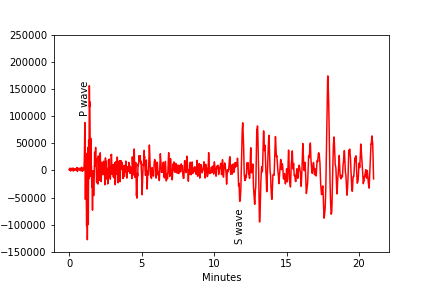

In [23]:
Image(filename='Figures/seismogram.png') # let's pull this back up.

And we can pick up where we left off by reading in the data which we already converted to minutes and   saved in Lecture 9.

In [24]:
EQ=pd.read_csv('minutes_velocity.csv')
EQ.head()

,Minutes,Velocity
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


### Filtering data with Pandas

Considering our seismic record, you know that the P wave arrives in the first few minutes of the record. To find the exact time, we can filter the data to look for the maximum (positive or negative) velocity between two time intervals, say 1 and 1.37 minutes, and take this as the P-wave arrival time.

To look at only the interval between two times,  we first need to understand some more about Pandas data structures. Remember that the **DataFrames** are made up of columns of data (with the indices) and  each Column is itself a **Series**.

We can access a particular series in two ways.  One is to use the **Series** name as a **key** (like in Dictionaries).  

In [25]:
print (EQ['Minutes'].head())
# I'm using head, because this is a really long series!   

0    0.000000
1    0.000833
2    0.001667
3    0.002500
4    0.003333
Name: Minutes, dtype: float64


OR, we can use the **Series** name as an attribute of the **DataFrame**: 

In [26]:
print (EQ.Minutes.head())

0    0.000000
1    0.000833
2    0.001667
3    0.002500
4    0.003333
Name: Minutes, dtype: float64


As you can see below, both of these are identical and are _instances_ of a Pandas **Series** class: 

In [27]:
print (type(EQ['Minutes']))
print (type(EQ.Minutes))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Let's take a closer look at one of these Series:

In [28]:
EQ.Minutes.head() 


0    0.000000
1    0.000833
2    0.001667
3    0.002500
4    0.003333
Name: Minutes, dtype: float64

The  EQ.Minutes **Series** floating point numbers and have indices (starting with 0).

You can filter the EQ **DataFrame** by placing conditions (which evaluate to True or False) on one of the **Series** (Minutes or Velocity).  This is reminiscent of the **filter( )** functions we learned in Lecture 11, so this should feel familiar by now.  

The syntax of a basic Pandas filter is: 

**DataFrame.Series[condition]**


The "P wave arrival" is by definition, the first wave recorded that exceeds "noise". So we need to calculate what the "noise" level is by getting the maximum and minimum values in the first part of the record, say the first minute.  

To find all the records where **EQ.Minutes** is less than 1, we need to set the condition to:

EQ.Minutes$<$1

Let's just see what that does: 





In [29]:
EQ.Minutes<1

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
25170    False
25171    False
25172    False
25173    False
25174    False
25175    False
25176    False
25177    False
25178    False
25179    False
25180    False
25181    False
25182    False
25183    False
25184    False
25185    False
25186    False
25187    False
25188    False
25189    False
25190    False
25191    False
25192    False
25193    False
25194    False
25195    False
25196    False
25197    False
25198    False
25199    False
Name: Minutes, Length: 25200, dtype: bool

So the **EQ.Minutes$<1$**  condition returned another Pandas **Series** with the **EQ.Minutes Series**  being evaluated for each element in the **Series**.   

If we then use the returned **Series** of booleans as the "key" in the DataFrame **EQ**, Pandas will return all the indices in the **DataFrame** for which the condition is **True**:  

In [30]:
EQ[EQ.Minutes<1]

,Minutes,Velocity
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0
5,0.004167,1394.0
6,0.005000,1282.0
7,0.005833,1198.0
8,0.006667,1077.0
9,0.007500,957.0


So let us assign this new **DataFrame** to **Noise**:

In [31]:
Noise=EQ[EQ.Minutes<1]
print (Noise.head())
print (Noise.tail())

    Minutes  Velocity
0  0.000000    1807.0
1  0.000833    1749.0
2  0.001667    1694.0
3  0.002500    1618.0
4  0.003333    1516.0
       Minutes  Velocity
1195  0.995833    2857.0
1196  0.996667    2761.0
1197  0.997500    2671.0
1198  0.998333    2627.0
1199  0.999167    2532.0


Here we created a NEW DataFrame, **Noise**, that is a subset of the original **EQ** and contains only  the first minute worth of data.

 There are many methods  for  Panda **Series**.  Two of these are   **max( )** and **min( )**.  To get the maximum and minimum values of the velocity Series in the first minute, we just apply **max( )** and **min( )** to the **Series**: 
 

In [32]:
NoiseMax=Noise.Velocity.max()
print ('maximum value: ',NoiseMax)
NoiseMin=Noise.Velocity.min()
print ('minimum value: ',NoiseMin)

maximum value:  5912.0
minimum value:  -1848.0


### Practice with Pandas filtering and methods

- Find the median acceleration from the EQ dataframe (function is **Series.median( )**)
- Find the mean acceleration (using  **Series.mean( )**). 
- Find all the accelerations that are between the mean and median.  

Now we can find the first Velocity that exceeds (in the absolute sense)  **NoiseMax** in the **EQ** DataFrame. 

To do this, we can find the first  peaks or troughs in the Velocity Series that are outside the bounds of **NoiseMax** and **NoiseMin** respectively.  So, here are all the peaks and troughs in the data series that exceed the noise bounds:  

In [33]:
Peaks=EQ[EQ.Velocity>NoiseMax]
print (Peaks.head())
Troughs=EQ[EQ.Velocity<NoiseMin]
print (Troughs.head())

       Minutes  Velocity
1230  1.025000    6344.0
1231  1.025833    6991.0
1232  1.026667    7655.0
1233  1.027500    8309.0
1234  1.028333    8912.0
       Minutes  Velocity
1323  1.102500   -4090.0
1324  1.103333   -8919.0
1325  1.104167  -13595.0
1326  1.105000  -18138.0
1327  1.105833  -22528.0


So a the first Velocity that exceeds the noise is a peak that arrives at 1.025 minutes.

We can make a variable named **PwaveArrival** by converting the Series **Peaks.Minutes** to an array and then selecting the first value in this array.  

To convert a **Series** to a **NumPy** array, we use the attribute **values**:      

In [34]:
PwaveArrivalArray=Peaks.Minutes.values
PwaveArrivalArray # see the array of values


array([  1.025     ,   1.02583333,   1.02666667, ...,  20.97666667,
        20.9775    ,  20.97833333])

So, we can pick out the first of these as the P wave arrival:

In [35]:
PwaveArrival=PwaveArrivalArray[0] # just take the first one.
PwaveArrival




1.0249999999999999

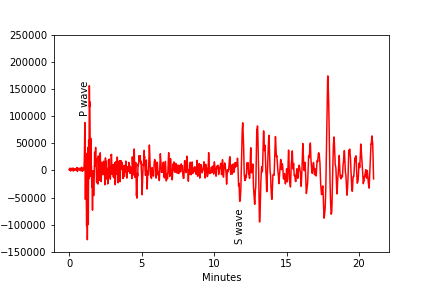

In [36]:
Image(filename='Figures/seismogram.png') # let's pull this back up.

After the P wave arrival, the earthquake rumbles along for a few minutes, so we need to re-characterize the noise floor, say between 5 and 10 minutes.  So we repeat the noise exercise for the period betewen 5 and 10 minutes.  In this case, we have TWO conditions:  the first being Minutes$>$5 and the second being Minutes$<$10. 

The first condition gets record after the first 5 minutes: 

In [37]:
PostP = EQ[EQ.Minutes>5] # find the dataframe portion that is after the P-wave arrival
PostP.head()

,Minutes,Velocity
6001,5.000833,-15898.0
6002,5.001667,-17112.0
6003,5.002500,-18312.0
6004,5.003333,-19544.0
6005,5.004167,-20811.0


To impose TWO conditions, we can combine each (enclosed in parentheses) with '&':  

In [38]:
Noise2=EQ[(EQ.Minutes >5) & (EQ.Minutes<10)]
print (Noise2.head()) # see, we only have data after 5 minutes
print (Noise2.tail()) # and before 10 minutes.  


       Minutes  Velocity
6001  5.000833  -15898.0
6002  5.001667  -17112.0
6003  5.002500  -18312.0
6004  5.003333  -19544.0
6005  5.004167  -20811.0
        Minutes  Velocity
11995  9.995833    9719.0
11996  9.996667   10343.0
11997  9.997500   10992.0
11998  9.998333   11599.0
11999  9.999167   12151.0


Following the same logic as before, we can find the bounds for the noise: 

In [39]:
Noise2Max=Noise2.Velocity.max()
Noise2Min=Noise2.Velocity.min()
print (Noise2Max,Noise2Min)

46816.0 -44753.0


 To find the new S wave arrival, we find the peaks and troughs that exceed the maximum and minimum values in the time between 5 and 10 minutes: 

In [40]:
Peaks2=PostP[PostP.Velocity>Noise2Max]
print (Peaks2.head())
Troughs2=PostP[PostP.Velocity<Noise2Min]
print (Troughs2.head())

         Minutes  Velocity
14295  11.912500   47019.0
14296  11.913333   48281.0
14297  11.914167   49717.0
14298  11.915000   51095.0
14299  11.915833   52369.0
         Minutes  Velocity
14089  11.740833  -44843.0
14090  11.741667  -45729.0
14091  11.742500  -46570.0
14092  11.743333  -47369.0
14093  11.744167  -48142.0


The S wave arrives as a trough at about 11.7 minutes into the earthquake.  

Let's retrieve that value like we did before (but saving some steps).  

In [41]:
SwaveArrival=Troughs2.Minutes.values[0]
SwaveArrival



11.740833333333333

So the time delay between P and S wave arrivals can be calculated by the difference in their arrival times: 



In [42]:
delayTime= SwaveArrival-PwaveArrival
delayTime

10.715833333333332

From this we see that there was a 10.7 minute delay.



If you have already taken geophysics, you probably know that seismologists have figured out the velocity of various seismic waves as a function of depth in the Earth.  From this model, there is a basic look up table that specifies the delay times as a function of distance (expressed as an angle) between the source and the receiver.  This model is in the file **DeltaTimeData.csv** that we already looked at, munched on and saved in Lecture 9.  

Let's take another look at this file: 


In [53]:
DeltaTimeData=pd.read_csv('DeltaTimeData.csv') # read this back in
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000,0.066667,0.156667
1,0.5,0,10.6,0,7.8,0.176667,0.130000,0.306667
2,1.0,0,17.7,0,13.5,0.295000,0.225000,0.520000
3,1.5,0,24.6,0,19.0,0.410000,0.316667,0.726667
4,2.0,0,31.4,0,24.4,0.523333,0.406667,0.930000






So, how many degrees away from the source is the reciever based on the DeltaTimeData data from the Reference Earth Model?  

Here is the plot from our reference model (again). 







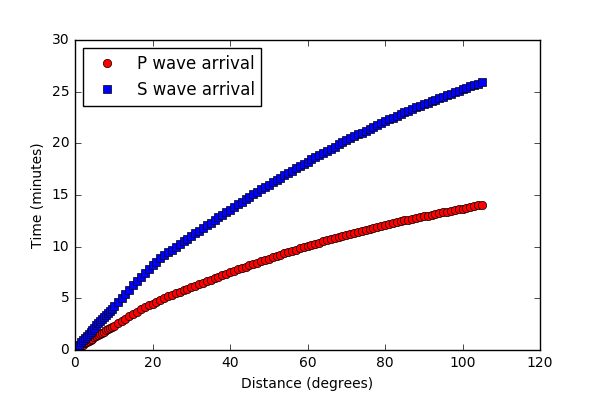

In [54]:
Image(filename='Figures/TravelTime.png')


We can bracket the angular distance this represents by filtering the **DeltaTimeData** DataFrame for those records within, say, .2 minutes the delay time:

In [48]:
DeltaTimeData=pd.read_csv('DeltaTimeData.csv') # read this back in
find_delta=DeltaTimeData[
        (DeltaTimeData.SP_decimal_minutes>delayTime-.2) & 
        (DeltaTimeData.SP_decimal_minutes<delayTime+.2)] # find_delta has all the records with SP_min less than 10
find_delta  

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
96,86.0,12,37.0,10,31.9,12.616667,10.531667,23.148333
97,87.0,12,41.9,10,36.7,12.698333,10.611667,23.310000
98,88.0,12,46.7,10,41.4,12.778333,10.690000,23.468333
99,89.0,12,51.4,10,46.1,12.856667,10.768333,23.625000
100,90.0,12,56.1,10,50.7,12.935000,10.845000,23.780000


So according the model, the earthquake occurred around 89 degrees away from the reciever.   

We know the location of both the earthquake and the reciever, so we could calculate the actual separation.  Let's do that now.

### Great Circle Distances

The earthquake occured in Chile and was recorded at Pinyon Flats (near us).  

Aside:  we will learn how to generate this map in the coming lectures!



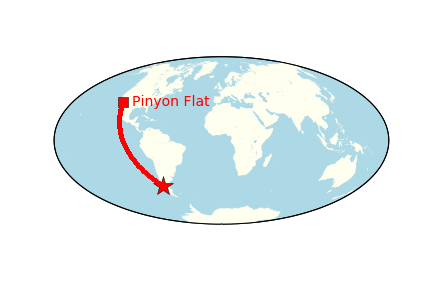

In [49]:
Image(filename='Figures/greatCirc.png')

First, we must calculate the angular distance (great circle distance in arc length - not kilometers) for the two points, B and C.  

We'll need to use _spherical trigonometry_ which is very useful in Earth Science because we live on a sphere. 

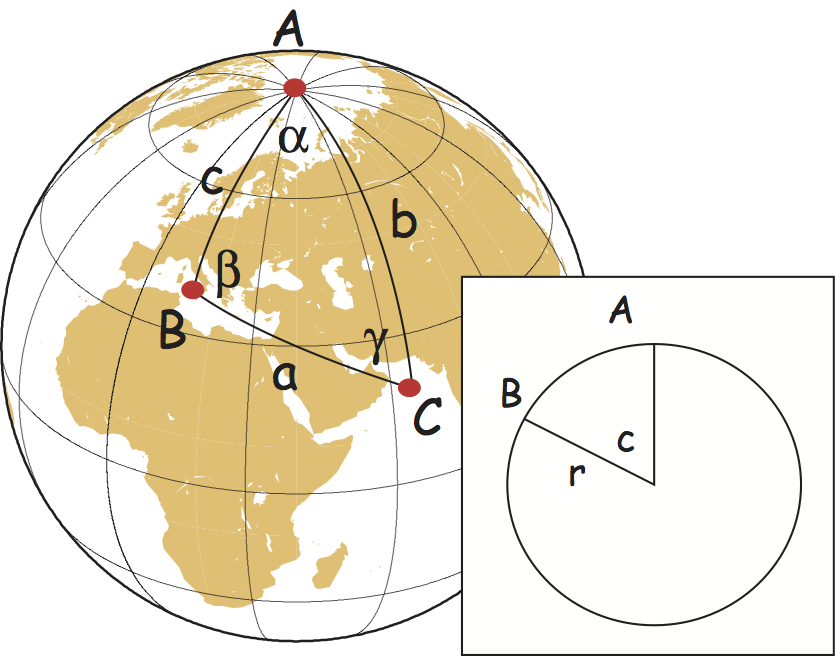

In [50]:
Image(filename='Figures/strig.png',width=500,height=500)




One of the laws of spherical trig is the Law of Cosines: 


$\cos a = \cos b \cos c + \sin b \sin c \cos \alpha$.

In our case, $a$ is the great circle distance between points on the globe, B and C.   

$b$ and $c$ are the co-latitudes (90-latitude) of points B and C and $\alpha$ is the difference in the two longitudes.

Now we have a formula, we can write a function to calculate from the latitudes and longitudes of the two points (lat_1,lon_1,lat_2,lon_2).  

In [51]:
def great_circle(lat_1,lon_1,lat_2,lon_2):
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2=90.-lat_1,90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=lon_2-lon_1
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),\
              np.radians(colat_2),np.radians(alpha)# continued line from above
    cosa=np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha)
    a=np.arccos(cosa)# take the arc cosine of cosa
    # remember to convert back to degrees!  
    return np.degrees(a)

### More practice with lamda functions

- write a function that takes latitudes and converts to colatitudes
- write a lambda function that takes two longitudes and returns alpha
- rewrite the great_circle function as a lambda funtion that takes colat_1, colat_2  and alpha as arguments and returns the latitudinal separation in degrees.  Remember about the radians/degrees thing on computers....  

In [52]:
PF_lat,PF_lon=33.3,-115.7
EQ_lat,EQ_lon=-43.42,-73.95
Delta=great_circle(PF_lat,PF_lon,EQ_lat,EQ_lon)
print ('Degrees separation between source and receiver: ',Delta)

Degrees separation between source and receiver:  85.6673157753


Earlier, we guessed that it would be about 89 degrees.  So this  is pretty close given our quick and dirty guesstimate.  

### Practice with great circles
- Use **great_circle( )** to find the angular difference between where you were born and Pinyon Flat (PF_lat,PF_lon).
- There are roughly 111 km in one degree, how many kilometers is the distance between your birthplace and Pinyon Flat?  

### Formatting strings in Python

Now for a word about formatting strings.    Notice how the output of  the above print statement printed out all the decimal places.  We can do better!
To show only the first decimal place we can use _string formatting_.  

The structure of a formatting statement is:

**'%FMT'%(DATA)**, 

where **FMT** is a 'format string'.   Here is an example in which the FMT is: 

**3.1f**.  



In [55]:
print (Delta) # no formatting
print ('%3.1f'%(Delta)) # with formatting

# can use round(Delta,1)  

85.6673157753
85.7


The first number (3) is the number of characters in the output. The second number (1) is the number of characters AFTER the decimal place.   The 'f' means that DATA is a floating point variable.  

Other format strings include:  %s for a string, %i for an integer, %e for 'scientific notation'.  

Recall from Lecture 2:

In [56]:
number=1 # an integer
Number=1.0 # a floating point
NUMBER='1' # a string


we can use the formatted string trick on them like this: 

In [57]:

print ('%i'%(number))
print ('%f'%(Number))
print ('%3.1f'%(Number))
print ('%s'%(NUMBER))




1
1.000000
1.0
1


Or for a bigger number: 

In [58]:
bignum=np.pi*1000
print (bignum)
print ('%6.5e'%(bignum))
print ('%3.2e'%(bignum))

3141.592653589793
3.14159e+03
3.14e+03


### Practice with formatting strings
- set a variable to the value of $\pi$.
- format that to have four significant figures.  
- print out a sentence with the formatted value of $\pi$ in it.  
- multiply $\pi$ by 50 and use the exponential form of string formatting to print out 4 significant digits.